In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize, Clustering
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
from learnMSA.protein_language_models import Common, EmbeddingBatchGenerator

2025-02-07 11:18:30.286486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-07 11:18:30.302520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-07 11:18:30.307422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1738923511.576121  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923511.612735  232777 cuda_executor.cc:1015] succ


# Experimental demo: learnMSA + protein language model

This notebook demonstrates how to align a set of protein sequences with learnMSA supported by a large, pre-trained protein language model.

This configuration of learnMSA is the most accurate variant of learnMSA currently available. It is also the most computationally expensive. It is recommended to run this notebook on a GPU.

In [2]:
# Your fasta file to align.
train_filename = "test/data/egf.fasta"

# (optional)
# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 4

In [ ]:
def align(filename, out_filename):
    scoring_model_config = Common.ScoringModelConfig()
    config = Configuration.make_default(num_models, 
                                        use_language_model=True, 
                                        scoring_model_config=scoring_model_config)
    # we have to define a special model- and batch generator if using a language model
    # because the emission probabilities are computed differently and the LM requires specific inputs
    model_gen = EmbeddingBatchGenerator.make_generic_embedding_model_generator(config["scoring_model_config"].dim)
    batch_gen = EmbeddingBatchGenerator.EmbeddingBatchGenerator(config["scoring_model_config"])
    with SequenceDataset(train_filename, fmt="fasta") as data:
        config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens))) #comment out to disable cropping
        alignment_model = Align.run_learnMSA(data,
                                            out_filename,
                                            config, 
                                            model_generator=model_gen,
                                            batch_generator=batch_gen,
                                            sequence_weights=Clustering.compute_sequence_weights(train_filename, "tmp", config["cluster_seq_id"]),
                                            verbose=True,
                                            align_insertions=True)
    return alignment_model

Training of 4 models on file egf.fasta
Configuration: 
{
num_models : 4
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=10000

/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Computing all embeddings (this may take a while).
10% done.
20% done.
30% done.
40% done.
50% done.
60% done.
70% done.
80% done.
90% done.
100% done.
Fitting models of lengths [22 24 25 25] on 7774 sequences.
Batch size= 190 Learning rate= 0.05
Using sequence weights  [1.         0.33333334 0.05882353 ... 0.05555556 0.03030303 0.25      ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using 1 GPUs.


I0000 00:00:1738923641.146619  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923641.146883  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923641.147042  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923641.147254  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1738923643.485092  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923643.485352  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923643.485510  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923643.485707  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

46/46 - 23s - 492ms/step - loss: 110.6017 - loglik: -9.4350e+01 - prior: -1.6252e+01 - aux_loss: 0.0000e+00
Epoch 2/10
46/46 - 4s - 98ms/step - loss: 78.6700 - loglik: -7.3180e+01 - prior: -5.4897e+00 - aux_loss: 0.0000e+00
Epoch 3/10
46/46 - 4s - 97ms/step - loss: 75.6377 - loglik: -7.1327e+01 - prior: -4.3106e+00 - aux_loss: 0.0000e+00
Epoch 4/10
46/46 - 5s - 98ms/step - loss: 74.9398 - loglik: -7.1062e+01 - prior: -3.8780e+00 - aux_loss: 0.0000e+00
Epoch 5/10
46/46 - 4s - 96ms/step - loss: 74.6791 - loglik: -7.0957e+01 - prior: -3.7222e+00 - aux_loss: 0.0000e+00
Epoch 6/10
46/46 - 5s - 99ms/step - loss: 74.6354 - loglik: -7.0986e+01 - prior: -3.6496e+00 - aux_loss: 0.0000e+00
Epoch 7/10
46/46 - 4s - 97ms/step - loss: 74.3814 - loglik: -7.0772e+01 - prior: -3.6093e+00 - aux_loss: 0.0000e+00
Epoch 8/10
46/46 - 4s - 97ms/step - loss: 74.3584 - loglik: -7.0789e+01 - prior: -3.5690e+00 - aux_loss: 0.0000e+00
Epoch 9/10
46/46 - 4s - 97ms/step - loss: 74.2814 - loglik: -7.0733e+01 - prior:

I0000 00:00:1738923709.206683  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923709.206936  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923709.207095  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923709.207302  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(10, 1), (11, 9)]
discards model 0: []
expansions model 1: [(12, 4), (13, 2), (16, 2), (18, 2)]
discards model 1: []
expansions model 2: [(12, 2), (13, 3), (14, 1), (17, 2), (19, 2)]
discards model 2: []
expansions model 3: [(12, 2), (13, 3), (14, 1), (17, 2), (19, 2)]
discards model 3: []
Re-initialized the encoder parameters.
Fitting models of lengths [32, 34, 35, 35] on 7774 sequences.
Batch size= 190 Learning rate= 0.05
Using sequence weights  [1.         0.33333334 0.05882353 ... 0.05555556 0.03030303 0.25      ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using 1 GPUs.


I0000 00:00:1738923714.995342  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923714.995590  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923714.995749  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923714.995948  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/20


I0000 00:00:1738923716.995527  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923716.995767  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923716.995925  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923716.996134  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

46/46 - 23s - 489ms/step - loss: 84.0846 - loglik: -6.6434e+01 - prior: -1.7651e+01 - aux_loss: 0.0000e+00
Epoch 2/20
46/46 - 4s - 98ms/step - loss: 70.2084 - loglik: -6.4084e+01 - prior: -6.1247e+00 - aux_loss: 0.0000e+00
Epoch 3/20
46/46 - 5s - 100ms/step - loss: 68.8310 - loglik: -6.4255e+01 - prior: -4.5757e+00 - aux_loss: 0.0000e+00
Epoch 4/20
46/46 - 5s - 99ms/step - loss: 68.3542 - loglik: -6.4355e+01 - prior: -3.9997e+00 - aux_loss: 0.0000e+00
Epoch 5/20
46/46 - 5s - 100ms/step - loss: 68.0929 - loglik: -6.4317e+01 - prior: -3.7760e+00 - aux_loss: 0.0000e+00
Epoch 6/20
46/46 - 5s - 98ms/step - loss: 68.0074 - loglik: -6.4363e+01 - prior: -3.6439e+00 - aux_loss: 0.0000e+00
Epoch 7/20
46/46 - 5s - 99ms/step - loss: 67.8114 - loglik: -6.4247e+01 - prior: -3.5643e+00 - aux_loss: 0.0000e+00
Epoch 8/20
46/46 - 5s - 99ms/step - loss: 67.7431 - loglik: -6.4235e+01 - prior: -3.5082e+00 - aux_loss: 0.0000e+00
Epoch 9/20
46/46 - 5s - 98ms/step - loss: 67.6882 - loglik: -6.4231e+01 - prior

I0000 00:00:1738923803.145378  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923803.145618  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923803.145776  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923803.145977  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Aligning 2 insertion slices with famsa.
time for generating output: 4.1200
Wrote file test/data/interactive.alignment.fasta
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step
>l=-56.58_t=0.00
............$CD.......P........N............P........CYN.HG..T..C..S........L......................RA..-....T....G..........YTCSCL....PR......Y....TGEH$.......................
>l=-59.97_t=0.00
............$CD.......S........Q............P........CRN.-G..T..C..Sl.......N......................TN..-....T....D..........YTCACF....PG......Y....TGRY$.......................
>l=-52.18_t=0.01
............$CD.......S........D............P........CLN.GG..T..C..T........L......................RS..L....D....S..........YSCACA....PG......Y....TGQH$.......................
>l=-65.94_t=0.00
............$CD.......H........V............T........CLN.GG..T..C..Q........L......................KT..L....E....D..........YTCACA....NG......Y....TGER$.......................
>l=-66.60_t=0.00
............$CD.......H........V............T..

/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sequences', 'indices', 'embeddings']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(
I0000 00:00:1738923812.735281  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923812.735517  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738923812.735675  232777 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative 

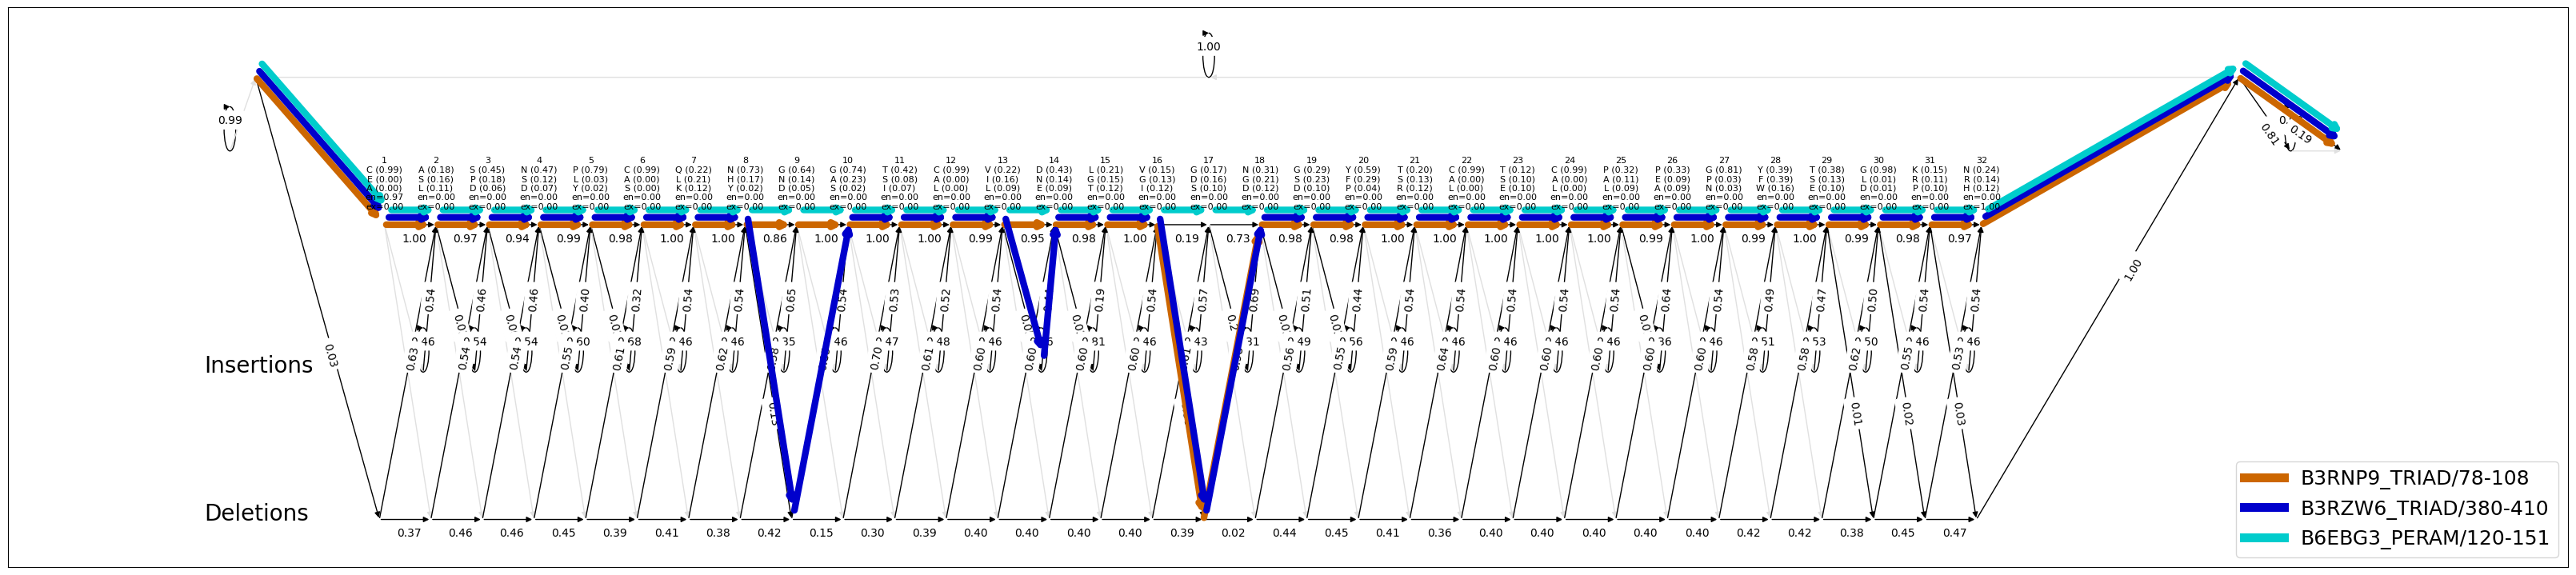

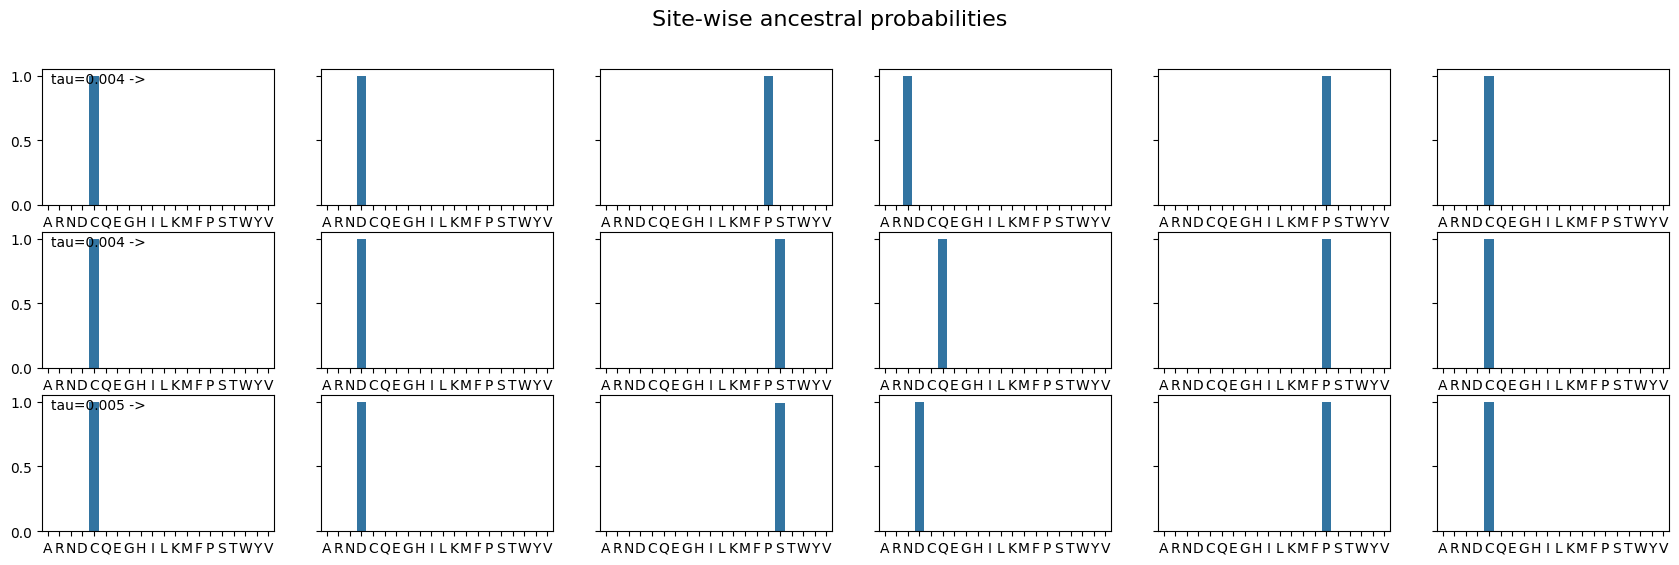

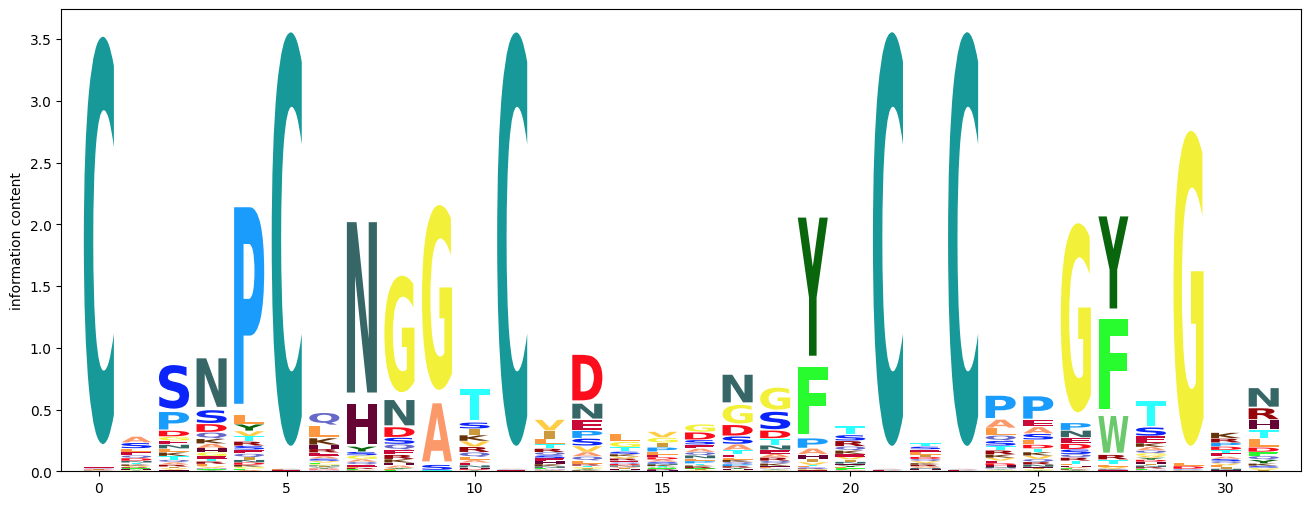

In [5]:
alignment_model = align(train_filename, "test/data/interactive.alignment.fasta") 
Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [5]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 1ixa
HERE: 1apo
HERE: 1urk
HERE: 1fsb
HERE: 1esl
HERE: 1hre
HERE: 1epi
HERE: 4tgf
HERE: 1hcgb
HERE: 1dan1
HERE: 1dan2
HERE: 1rfnb


In [6]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    79.8 [100.0]   [ 5182]
